In [1]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import ModelCheckpoint

import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn import datasets, linear_model
from random import seed, randint

(300, 2) (300,)


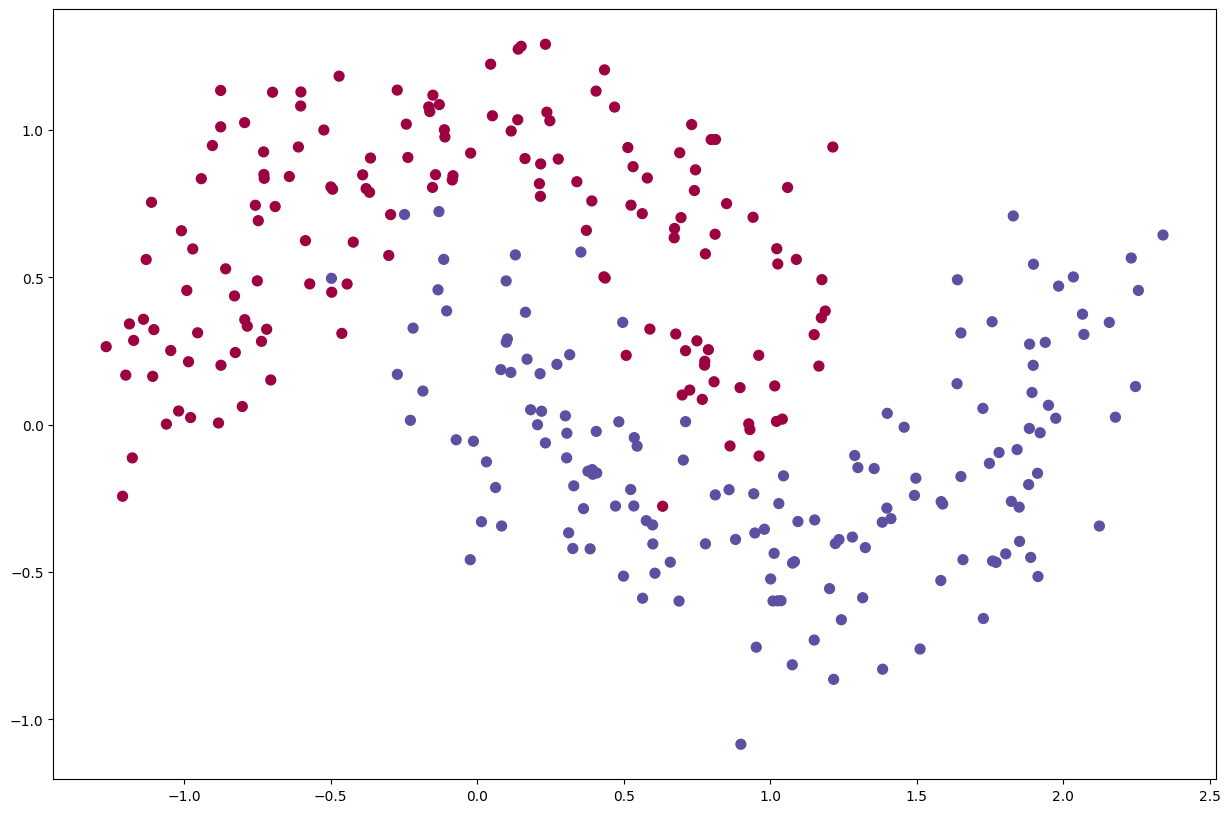

In [2]:
# dataset
X_tra, y_tra = sklearn.datasets.make_moons(300, noise=0.2)
X_val, y_val = sklearn.datasets.make_moons(300, noise=0.2)
X_tst, y_tst = sklearn.datasets.make_moons(300, noise=0.25)

print(X_tra.shape, y_tra.shape )

plt.figure(1, figsize=(15,10))
plt.scatter(X_tra[:,0], X_tra[:,1], c=y_tra, cmap=plt.cm.Spectral, s=50)

In [4]:
# model definition
model = Sequential()
model.add(Dense(12, activation='relu', input_shape=(2,)))
model.add(Dense(6, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

# imprime resumen del modelo
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 12)                36        
                                                                 
 dense_4 (Dense)             (None, 6)                 78        
                                                                 
 dense_5 (Dense)             (None, 1)                 7         
                                                                 
Total params: 121 (484.00 Byte)
Trainable params: 121 (484.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [5]:
# model training
epochs = 500
batch = 50
checkpoint_filepath = 'best_model'
model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_loss',
    mode='min',
    save_best_only=True)

history = model.fit(X_tra, y_tra, epochs=epochs, batch_size=batch, verbose=1, shuffle=True, validation_data=(X_val, y_val), callbacks=[model_checkpoint_callback])

Epoch 1/500
6/6 [==============================] - 6s 79ms/step - loss: 0.6645 - accuracy: 0.4767 - val_loss: 0.6586 - val_accuracy: 0.4967
Epoch 2/500
6/6 [==============================] - 0s 29ms/step - loss: 0.6474 - accuracy: 0.5300 - val_loss: 0.6367 - val_accuracy: 0.5833
Epoch 3/500
6/6 [==============================] - 0s 23ms/step - loss: 0.6250 - accuracy: 0.6133 - val_loss: 0.6127 - val_accuracy: 0.6700
Epoch 4/500
6/6 [==============================] - 0s 36ms/step - loss: 0.6010 - accuracy: 0.7000 - val_loss: 0.5892 - val_accuracy: 0.7033
Epoch 5/500
6/6 [==============================] - 0s 35ms/step - loss: 0.5776 - accuracy: 0.7333 - val_loss: 0.5677 - val_accuracy: 0.7267
Epoch 6/500
6/6 [==============================] - 0s 23ms/step - loss: 0.5591 - accuracy: 0.7467 - val_loss: 0.5467 - val_accuracy: 0.7500
Epoch 7/500
6/6 [==============================] - 0s 29ms/step - loss: 0.5378 - accuracy: 0.7633 - val_loss: 0.5279 - val_accuracy: 0.7633
Epoch 8/500
6/6 [===

In [6]:
model.load_weights(checkpoint_filepath)
_, acc_tra = model.evaluate(X_tra, y_tra)
_, acc_val = model.evaluate(X_val, y_val)
_, acc_tst = model.evaluate(X_tst, y_tst)
print('{:.3f}, {:.3f}, {:.3f}'.format(acc_tra, acc_val, acc_tst))

10/10 [==============================] - 0s 3ms/step - loss: 0.0835 - accuracy: 0.9733
0.977, 0.977, 0.973


749/749 [==============================] - 1s 2ms/step
(149688, 1) (308, 486) (308, 486)


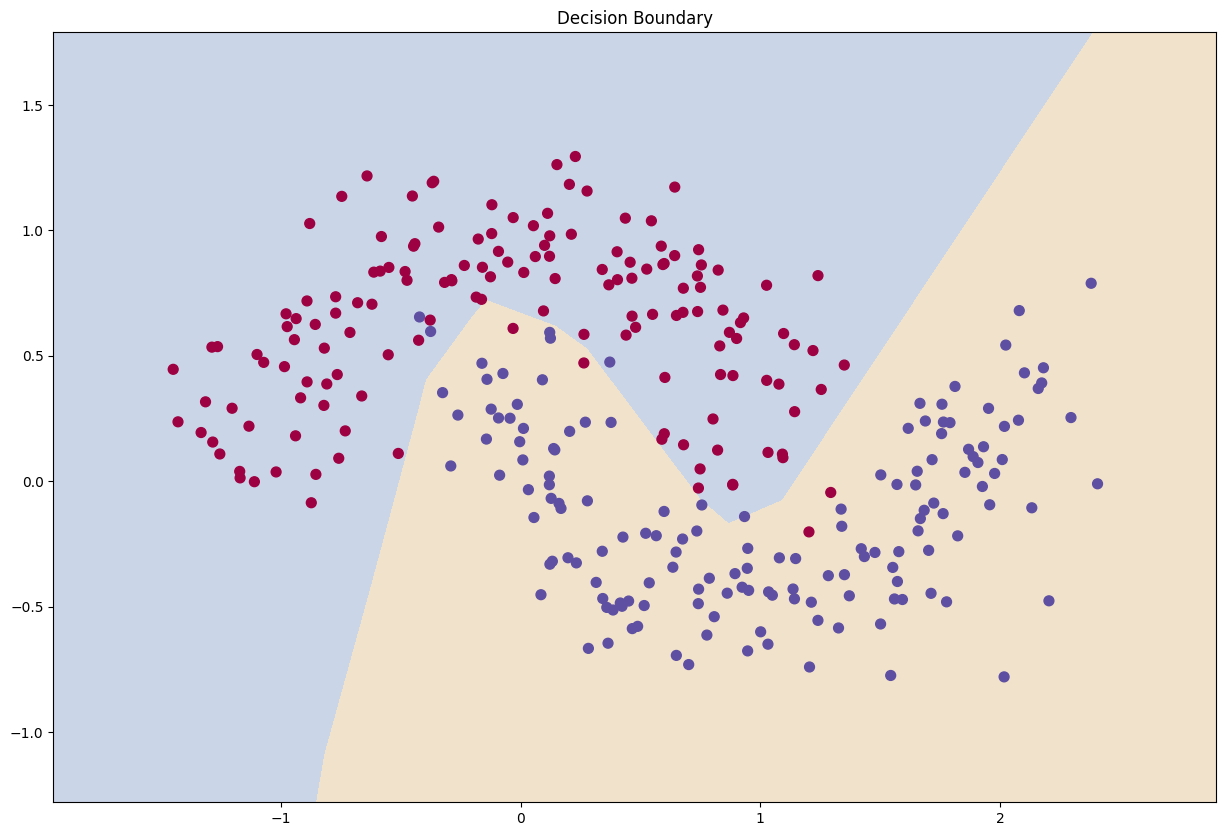

In [8]:
def plot_decision_boundary(pred_func):
    # Set min and max values and give it some padding
    x_min, x_max = X_tst[:, 0].min() - .5, X_tst[:, 0].max() + .5
    y_min, y_max = X_tst[:, 1].min() - .5, X_tst[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    print(Z.shape, xx.shape, yy.shape)
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Pastel2, levels=1)
    plt.scatter(X_tst[:, 0], X_tst[:, 1], c=y_tst, cmap=plt.cm.Spectral, s=50)

# Predict and plot
plt.figure(2, figsize=(15,10))
plot_decision_boundary(lambda x: model.predict(x, batch_size=200))
plt.title("Decision Boundary")
plt.show()

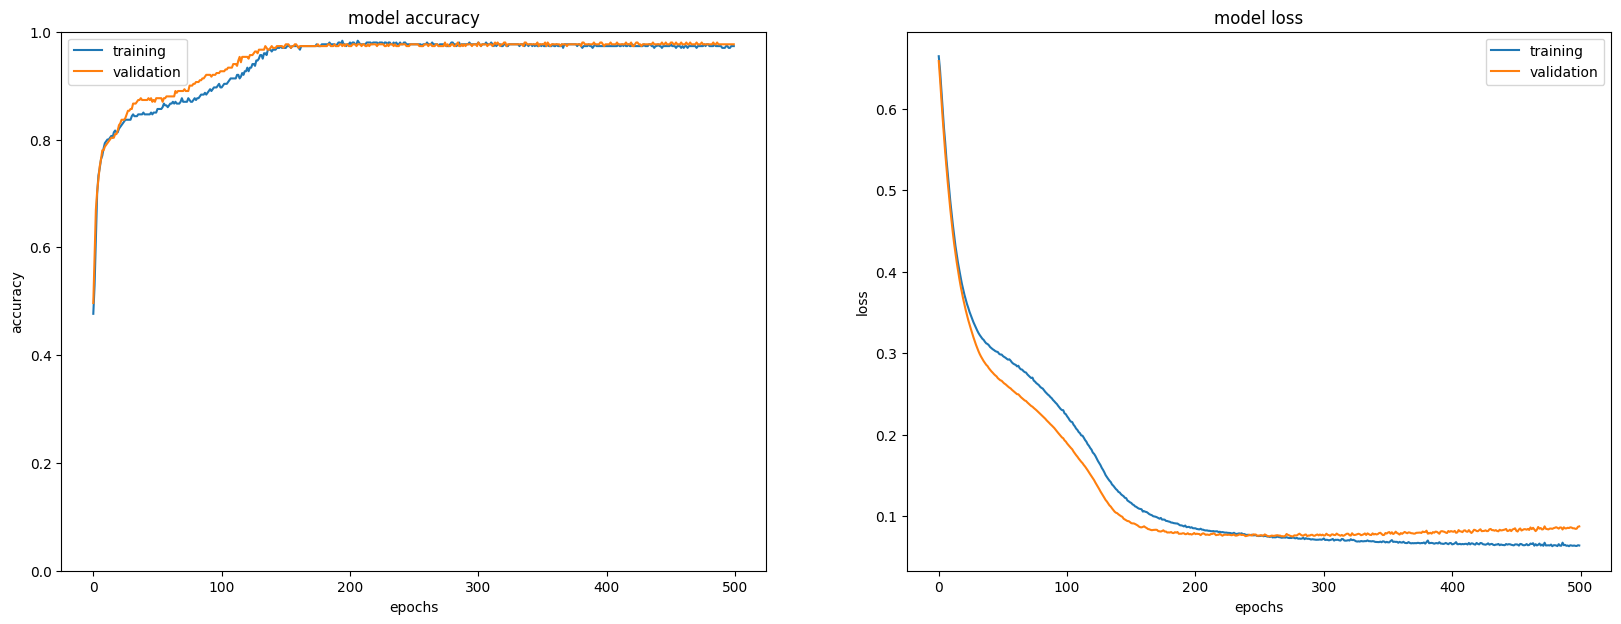

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(20,7))
ax[0].plot(history.history['accuracy'], label='training')
ax[0].plot(history.history['val_accuracy'], label='validation')
ax[0].set_ylim(0, 1)
ax[0].set_title('model accuracy')
ax[0].set_ylabel('accuracy')
ax[0].set_xlabel('epochs')
ax[0].legend()
plt.legend(['train', 'test'], loc='upper left')
ax[1].plot(history.history['loss'], label='training')
ax[1].plot(history.history['val_loss'], label='validation')
ax[1].set_title('model loss')
ax[1].set_ylabel('loss')
ax[1].set_xlabel('epochs')
ax[1].legend()
plt.show()